## Instituto Federal do Sudeste de Minas Gerais, Campus Barbacena
### Projeto Laboratório de Redes de Conhecimento

## Curso de Mineração de Dados Aplicada

Prof. Rafael José de Alencar Almeida
<rafael.alencar@ifsudestemg.edu.br>

### Aula 3:  Coleta de Dados

Nesta aula iremos aprender como criar nosso próprio dataset, coletando dados de uma página web ou API.

### Biblioteca requests

Biblioteca para requisições web (HTTP).

<code>pip install requests</code>

In [1]:
import requests

# Realiza uma requisição HTTP GET
req = requests.get('https://barbacenaonline.com.br/')

In [2]:
req

<Response [200]>

In [3]:
req.headers

{'Date': 'Mon, 05 Nov 2018 23:09:04 GMT', 'Server': 'Apache', 'Vary': 'Accept-Encoding,User-Agent', 'Last-Modified': 'Mon, 05 Nov 2018 20:43:01 GMT', 'Accept-Ranges': 'bytes', 'Content-Length': '26639', 'Cache-Control': 'max-age=0', 'Expires': 'Mon, 05 Nov 2018 23:09:04 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Encoding': 'gzip'}

In [4]:
req.headers['Server']

'Apache'

In [5]:
req.status_code

200

In [6]:
req.reason

'OK'

In [7]:
req.text

'<!DOCTYPE html> <!--[if IE 8]><html class="ie ie8" lang="pt-BR"> <![endif]--> <!--[if IE 9]><html class="ie ie9" lang="pt-BR"> <![endif]--> <!--[if gt IE 9]><!--><html lang="pt-BR"> <!--<![endif]--><head><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto:400,700,500,400italic%7CLato:400" /><link rel="stylesheet" href="https://barbacenaonline.com.br/application/cache/min/1/c8a53adb1bc3c8f215c452ae65c67051.css" data-minify="1" /><script type=\'text/javascript\' src=\'https://barbacenaonline.com.br/application/cache/busting/1/wp-includes/js/jquery/jquery-1.12.4.js\'></script><script async src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async src="//pagead2.googlesyndication.com/

In [8]:
# Realiza uma requisição HTTP HEAD
req = requests.head('https://barbacenaonline.com.br/')

In [9]:
req.headers

{'Date': 'Mon, 05 Nov 2018 23:09:07 GMT', 'Server': 'Apache', 'Link': '<https://barbacenaonline.com.br/wp-json/>; rel="https://api.w.org/", <https://barbacenaonline.com.br/>; rel=shortlink', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding,User-Agent', 'Cache-Control': 'max-age=0', 'Expires': 'Mon, 05 Nov 2018 23:09:07 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=UTF-8'}

In [10]:
req.text

''

### Expressões regulares

Uma expressão regular (er, re, regex, regexp) é uma notação definida em uma linguagem formal, concisa e flexível, para identificação de padrões de caracteres desejados.

As expressões são contruídas na forma de uma string, combinando caracteres literais e caracteres especiais (curingas), chamados metacaracteres.

Para evitar que o Python pre-processe caractes com \, deve-se definir a string como raw (sem pre-processamento):

<code>re1 = r'\d+ '</code>

In [11]:
import re

Quando um texto equivale à expressão regular definida, dizemos que o mesmo "casou" com a expressão:

In [12]:
if re.match(r'[gr]ato', 'gato'):
    print('Casou')

Casou


In [13]:
if re.match(r'[gr]ato', 'rato'):
    print('Casou')

Casou


In [14]:
if re.match(r'[gr]ato', 'pato'):
    print('Casou')

### Resumo

<img src="./img/re.png">

<strong>Exemplo interativo:</strong> http://piazinho.com.br/ed5/exemplos.html

### Exemplos práticos

<code>re.match(padrao, string, flags=0)</code>

Busca o padrão a partir do início da string.
Retorna um objeto match caso encontre o padrão. Caso contrário, retorna None.

In [15]:
re.match(r'[gr]ato', 'gato')

<_sre.SRE_Match object; span=(0, 4), match='gato'>

In [16]:
re.match(r'[gr]ato', 'pato')

In [17]:
re.match(r'[gr]ato', 'gato').group()

'gato'

In [18]:
re.match(r'([gr])(ato)', 'gato').group(0)

'gato'

In [19]:
re.match(r'([gr])(ato)', 'gato').group(1)

'g'

In [20]:
re.match(r'([gr])(ato)', 'gato').group(2)

'ato'

<code>re.findall(padrao, string, flags=0)</code>

Retorna uma lista com todas as ocorrências não sobrepostas do padrão na string.

<br>

<strong>Obter o título das notícias do Barbacena Online (passo a passo):</strong>

In [21]:
html = requests.get('https://barbacenaonline.com.br/').text

In [22]:
'''
<div class="item-content"> <a  title="Presídio de São João del-Rei ganha novas vagas" data-src="https://barbacenaonline.com.br/application/themes/publisher/images/default-thumb/publisher-lg.png"				class="img-cont" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/"></a>
'''

'\n<div class="item-content"> <a  title="Presídio de São João del-Rei ganha novas vagas" data-src="https://barbacenaonline.com.br/application/themes/publisher/images/default-thumb/publisher-lg.png"\t\t\t\tclass="img-cont" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/"></a>\n'

In [23]:
re.findall(r'<a title=".+"', html)

[]

In [24]:
re.findall(r'<a +title=".+"', html)

['<a  title="Presídio de São João del-Rei ganha novas vagas" data-src="https://barbacenaonline.com.br/application/themes/publisher/images/default-thumb/publisher-lg.png"\t\t\t\tclass="img-cont" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/"></a><div class="term-badges floated"><span class="term-badge term-23"><a href="https://barbacenaonline.com.br/category/regiao/">Região</a></span></div><div class="content-container"><h2 class="title"> <a href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/" class="post-url post-title"> Presídio de São João del-Rei ganha novas vagas </a></h2><div class="post-meta"><span class="time"><time class="post-published updated"',
 '<a  title="Homem atingido nas nádegas por disparo de arma de fogo" data-src="https://barbacenaonline.com.br/application/uploads/2018/06/Arma-1306-e1528897950308-279x220.jpg" data-bs-srcset="{&quot;baseurl&quot;:&quot;https:\\/\\/barbacenaonline.com.br\\/applicat

In [25]:
re.findall(r'<a +title=".+?"', html)

['<a  title="Presídio de São João del-Rei ganha novas vagas"',
 '<a  title="Homem atingido nas nádegas por disparo de arma de fogo"',
 '<a  title="Sine divulga 17 vagas de emprego com salários de até R$3.816"',
 '<a  title="Dupla presa em flagrante comprava drogas em SJDR e distribuía em Barbacena"',
 '<a  title="Congresso de Medicina Antroposófica põe em discussão as Práticas Integrativas"',
 '<a  title="Testes no trânsito são prorrogados"',
 '<a  title="Guarda Civil Municipal participa de capacitação para atuar no trânsito"',
 '<a  title="Mais de sete mil pessoas farão o Enem em Barbacena"',
 '<a  title="Dupla presa em flagrante comprava drogas em SJDR e distribuía em Barbacena"',
 '<a  title="Corsa capota no Santa Efigênia"',
 '<a  title="Motociclista atropela pedestre na Praça da Boa Morte"',
 '<a  title="Homem preso no São Pedro por armazenar pornografia infantil"',
 '<a  title="Incêndio em residência resulta em prejuízos materiais"',
 '<a  title="Saída de pista entre Pinheiro Gro

In [26]:
re.findall(r'<a +title="(.+?)"', html)

['Presídio de São João del-Rei ganha novas vagas',
 'Homem atingido nas nádegas por disparo de arma de fogo',
 'Sine divulga 17 vagas de emprego com salários de até R$3.816',
 'Dupla presa em flagrante comprava drogas em SJDR e distribuía em Barbacena',
 'Congresso de Medicina Antroposófica põe em discussão as Práticas Integrativas',
 'Testes no trânsito são prorrogados',
 'Guarda Civil Municipal participa de capacitação para atuar no trânsito',
 'Mais de sete mil pessoas farão o Enem em Barbacena',
 'Dupla presa em flagrante comprava drogas em SJDR e distribuía em Barbacena',
 'Corsa capota no Santa Efigênia',
 'Motociclista atropela pedestre na Praça da Boa Morte',
 'Homem preso no São Pedro por armazenar pornografia infantil',
 'Incêndio em residência resulta em prejuízos materiais',
 'Saída de pista entre Pinheiro Grosso e Senhora das Dores',
 'Carreta pega fogo e chamas atingem vegetação',
 'Pitbull ataca outro cão no Santa Efigênia',
 'SJDR: Jovem fratura a perna em acidente',
 '

<strong>Gerar dataset com o título e o link das notícias do Barbacena Online:</strong>

In [27]:
'''
<div class="item-content"> <a  title="Presídio de São João del-Rei ganha novas vagas" data-src="https://barbacenaonline.com.br/application/themes/publisher/images/default-thumb/publisher-lg.png"\t\t\t\tclass="img-cont" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/"></a>

'''

'\n<div class="item-content"> <a  title="Presídio de São João del-Rei ganha novas vagas" data-src="https://barbacenaonline.com.br/application/themes/publisher/images/default-thumb/publisher-lg.png"\t\t\t\tclass="img-cont" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/"></a>\n\n'

In [28]:
re.findall(r'<a +title="(.+?)" +data-src="(.+?)"', html)[0]

('Presídio de São João del-Rei ganha novas vagas',
 'https://barbacenaonline.com.br/application/themes/publisher/images/default-thumb/publisher-lg.png')

In [29]:
import pandas as pd

df = pd.DataFrame(
    re.findall(r'<a +title="(.+?)" +data-src="(.+?)"', html),
    columns=['titulo', 'link']
)

df.head()

,titulo,link
0,Presídio de São João del-Rei ganha novas vagas,https://barbacenaonline.com.br/application/the...
1,Homem atingido nas nádegas por disparo de arma...,https://barbacenaonline.com.br/application/upl...
2,Sine divulga 17 vagas de emprego com salários ...,https://barbacenaonline.com.br/application/upl...
3,Dupla presa em flagrante comprava drogas em SJ...,https://barbacenaonline.com.br/application/upl...
4,Congresso de Medicina Antroposófica põe em dis...,https://barbacenaonline.com.br/application/upl...


### Beautiful Soup

Biblioteca para analisar documentos HTML e XML.

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [30]:
from bs4 import BeautifulSoup

In [31]:
soup = BeautifulSoup(html, 'html.parser')

In [32]:
soup.find('title')

<title>Barbacena Online – Notícias em Barbacena e região</title>

In [33]:
soup.find('title').name

'title'

In [34]:
soup.find('title').text

'Barbacena Online – Notícias em Barbacena e região'

In [35]:
soup.find('title').parent.name

'head'

In [36]:
soup.find_all('p')

[<p class="bsac-caption">- Advertisement -</p>,
 <p class="bsac-caption">- Advertisement -</p>,
 <p>Portal de Notícias Barbacena Online<br/> Fundado em 01 de setembro de 2001</p>,
 <p>E-mail: contato@barbacenaonline.com.br</p>,
 <p>Whatsaap: (32) 9-8835-4900</p>,
 <p class="section-heading sh-t5 sh-s1 main-term-none"> <span class="h-text main-term-none main-link"> Mais vistos </span></p>,
 <p class="title"> <a class="post-url post-title" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/"> Presídio de São João del-Rei ganha novas vagas </a></p>,
 <p class="title"> <a class="post-url post-title" href="https://barbacenaonline.com.br/homem-atingido-nas-nadegas-por-disparo-de-arma-de-fogo/"> Homem atingido nas nádegas por disparo de arma de fogo </a></p>,
 <p class="title"> <a class="post-url post-title" href="https://barbacenaonline.com.br/sine-divulga-17-vagas-de-emprego-com-salarios-de-ate-r3-816/"> Sine divulga 17 vagas de emprego com salários de até R

In [37]:
soup.find_all('p')[0].text

'- Advertisement -'

In [38]:
soup.find_all('article', class_='type-post')[0]

<article class="post-6040 type-post format-standard has-post-thumbnail listing-item-1 listing-item listing-mg-item listing-mg-2-item listing-mg-type-1 main-term-23"><div class="item-content"> <a class="img-cont" data-src="https://barbacenaonline.com.br/application/themes/publisher/images/default-thumb/publisher-lg.png" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/" title="Presídio de São João del-Rei ganha novas vagas"></a><div class="term-badges floated"><span class="term-badge term-23"><a href="https://barbacenaonline.com.br/category/regiao/">Região</a></span></div><div class="content-container"><h2 class="title"> <a class="post-url post-title" href="https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/"> Presídio de São João del-Rei ganha novas vagas </a></h2><div class="post-meta"><span class="time"><time class="post-published updated" datetime="2018-11-05T18:41:43+00:00">5 nov, 2018</time></span></div></div></div></ar

In [39]:
soup.find_all('article', class_='type-post')[0].find('a')['title']

'Presídio de São João del-Rei ganha novas vagas'

In [40]:
soup.find_all('article', class_='type-post')[0].find('a')['href']

'https://barbacenaonline.com.br/presidio-de-sao-joao-del-rei-ganha-novas-vagas/'

### Consumindo uma API

APIs (Application Programming Interface) possibilitam a comunicação entre seu código e um sistema remoto, como uma rede social.

Exemplo: OMDb API - The Open Movie Database

http://www.omdbapi.com/

Gerar uma chave (API key) e ativar o link enviado por e-mail.

In [41]:
API = 'http://www.omdbapi.com/?apikey=••••••••&'

In [42]:
# Montar dataset de filmes de guerra
requests.get(API + 's=war').json()

{'Response': 'True',
 'Search': [{'Poster': 'https://m.media-amazon.com/images/M/MV5BNDQ4YzFmNzktMmM5ZC00MDZjLTk1OTktNDE2ODE4YjM2MjJjXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg',
   'Title': 'World War Z',
   'Type': 'movie',
   'Year': '2013',
   'imdbID': 'tt0816711'},
  {'Poster': 'https://m.media-amazon.com/images/M/MV5BMjQ0MTgyNjAxMV5BMl5BanBnXkFtZTgwNjUzMDkyODE@._V1_SX300.jpg',
   'Title': 'Captain America: Civil War',
   'Type': 'movie',
   'Year': '2016',
   'imdbID': 'tt3498820'},
  {'Poster': 'https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_SX300.jpg',
   'Title': 'Avengers: Infinity War',
   'Type': 'movie',
   'Year': '2018',
   'imdbID': 'tt4154756'},
  {'Poster': 'https://m.media-amazon.com/images/M/MV5BNDUyODAzNDI1Nl5BMl5BanBnXkFtZTcwMDA2NDAzMw@@._V1_SX300.jpg',
   'Title': 'War of the Worlds',
   'Type': 'movie',
   'Year': '2005',
   'imdbID': 'tt0407304'},
  {'Poster': 'https://m.media-amazon.com/images/M/MV5BMTYzZWE3MDAtZjZkMi0

<strong>Visualizador:</strong> https://jsoneditoronline.org/

<img src="./img/json.png">

In [43]:
# Coletando os 100 primeiros resultados
dados = []

for pagina in range(1, 11):
    j = requests.get(API + 's=war').json()
    for resultado in j['Search']:
        dados.append([
            resultado['Title'],
            resultado['Type'],
            resultado['Year'],
            resultado['Poster'],
            resultado['imdbID'],
        ])

In [44]:
df = pd.DataFrame(dados, columns=['titulo', 'tipo', 'ano', 'poster', 'id_imdb'])

print(df.shape)

df.head()

(100, 5)


,titulo,tipo,ano,poster,id_imdb
0,World War Z,movie,2013,https://m.media-amazon.com/images/M/MV5BNDQ4Yz...,tt0816711
1,Captain America: Civil War,movie,2016,https://m.media-amazon.com/images/M/MV5BMjQ0MT...,tt3498820
2,Avengers: Infinity War,movie,2018,https://m.media-amazon.com/images/M/MV5BMjMxNj...,tt4154756
3,War of the Worlds,movie,2005,https://m.media-amazon.com/images/M/MV5BNDUyOD...,tt0407304
4,Lord of War,movie,2005,https://m.media-amazon.com/images/M/MV5BMTYzZW...,tt0399295


In [45]:
df['ano'].unique()

array(['2013', '2016', '2018', '2005', '2017', '2012', '2011', '2007'],
      dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
titulo     100 non-null object
tipo       100 non-null object
ano        100 non-null object
poster     100 non-null object
id_imdb    100 non-null object
dtypes: object(5)
memory usage: 4.0+ KB


In [47]:
# Corrigindo o tipo do ano
df = df.astype({'ano': int})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
titulo     100 non-null object
tipo       100 non-null object
ano        100 non-null int64
poster     100 non-null object
id_imdb    100 non-null object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


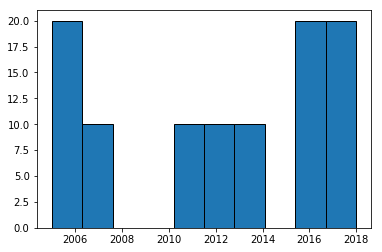

In [52]:
# Distribuição dos filmes por ano
df['ano'].hist(edgecolor='black', grid=False)

In [55]:
# Adicionando nova coluna: tamanho do título
df['tam_titulo'] = df['titulo'].apply(lambda x: len(x))

df.head()

,titulo,tipo,ano,poster,id_imdb,tam_titulo
0,World War Z,movie,2013,https://m.media-amazon.com/images/M/MV5BNDQ4Yz...,tt0816711,11
1,Captain America: Civil War,movie,2016,https://m.media-amazon.com/images/M/MV5BMjQ0MT...,tt3498820,26
2,Avengers: Infinity War,movie,2018,https://m.media-amazon.com/images/M/MV5BMjMxNj...,tt4154756,22
3,War of the Worlds,movie,2005,https://m.media-amazon.com/images/M/MV5BNDUyOD...,tt0407304,17
4,Lord of War,movie,2005,https://m.media-amazon.com/images/M/MV5BMTYzZW...,tt0399295,11


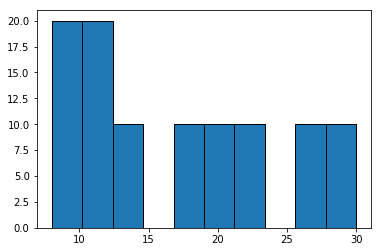

In [56]:
df['tam_titulo'].hist(edgecolor='black', grid=False)

In [80]:
# Salvando o dataset
df.to_csv('filmes.csv', index=False)

In [50]:
# Renderizando HTML
from IPython.core.display import display, HTML

display(HTML('<h1>Hello, world!</h1>'))

In [51]:
# Exibindo os 5 primeiros pôsteres
for i in range(5):
    print(df['titulo'].iloc[i])
    
    display(HTML('<img src="{0}" style="width: 20%">'.format(df['poster'].iloc[i])))
    display(HTML('<hr>'))

World War Z


Captain America: Civil War


Avengers: Infinity War


War of the Worlds


Lord of War


## Atividade para sala

Criar seu próprio dataset (tema livre) coletando dados de um site ou API. O dataset produzido precisa ter <strong>no mínimo</strong>:

<ul>
    <li>500 registros (linhas)</li>
    <li>6 features (colunas)</li>
</ul>

Salvar o dataset no formato CSV.

## Atividade para casa


Realizar a análise exploratória do seu dataset, e apresentar para a turma na próxima aula, na forma de apresentação de slides.